## House Price Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
1. Load the dataset
2. Handle missing values
3. Encode categorical variables
4. Feature scaling

In [3]:
df=pd.read_csv("House Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df.isnull().sum()   

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
# Check unique values for all columns
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("------")

Unique values in area_type:
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
------
Unique values in availability:
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
------
Unique values in location:
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '1

In [10]:
#checking the frequency of unique values in column 
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [11]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [12]:
df.shape

(13320, 9)

In [13]:
#Count the number of missing values in each column
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
#Drop the columns that are not required to build our model
df1=df.drop(columns=['area_type','society','balcony','availability'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
print(df.shape)
print(df1.shape)

(13320, 9)
(13320, 5)


In [17]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
df2=df1.dropna()
print(f"Shape of the modified dataframe 2: ",df2.shape)
print(f"Shape of the  dataframe1 : ",df1.shape)

Shape of the modified dataframe 2:  (13246, 5)
Shape of the  dataframe1 :  (13320, 5)


In [19]:
num_houses_with_more_than_6_bathrooms =(df1["bath"]>6).sum()
print(f"Number of Houses with more than 6 bathroom: {num_houses_with_more_than_6_bathrooms}")

Number of Houses with more than 6 bathroom: 242


In [20]:
# Find the unique values in the "bath" column that are greater than 6
unique_bathrooms_more_than_6 = df1[df1["bath"] > 6]["bath"].unique()
num_unique_bathrooms_more_than_6 = len(unique_bathrooms_more_than_6)

print(f"Number of unique values of bathrooms more than 6: {num_unique_bathrooms_more_than_6}")
print(f"Unique values of bathrooms more than 6: {unique_bathrooms_more_than_6}")

Number of unique values of bathrooms more than 6: 13
Unique values of bathrooms more than 6: [ 9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13. 18.]


In [21]:
#Drop the rows with missing values
df2=df1.dropna()
print(f"Shape of the modified dataframe 2: ",df2.shape)
print(f"Shape of the  dataframe1 : ",df1.shape)

Shape of the modified dataframe 2:  (13246, 5)
Shape of the  dataframe1 :  (13320, 5)


In [22]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [24]:
#Feature Engineering
#Add new feature(integer) for bhk (Bedrooms Hall Kitchen)
#df2.insert(3,"BHK",df2['size'].apply(lambda x: int(x.split(" ")[0])))
df2["BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\sakib_1584\AppData\Local\Temp\ipykernel_12828\4091970978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [25]:
df2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [26]:
#df2.drop(columns=['size'],axis=1, inplace=True)
#df2.head()

In [27]:
df2.describe()

,bath,price,BHK
count,13246.000000,13246.000000,13246.000000
mean,2.692586,112.389392,2.801902
std,1.341506,149.076587,1.295758
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [28]:
def isfloat_or_not(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df2[~df2['total_sqft'].apply(isfloat_or_not)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
def convert_sqft(x):
    if isinstance(x,str):
        temp= x.split("-")
        if len(temp)==2:
            return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
df2["total_sqft"]=df2["total_sqft"].apply(convert_sqft)


C:\Users\sakib_1584\AppData\Local\Temp\ipykernel_12828\1216743167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["total_sqft"]=df2["total_sqft"].apply(convert_sqft)


In [32]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [34]:
df3=df2.copy()

df3.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [35]:
df3["price_per_sqft"]=df3["price"]*100000/df3["total_sqft"]
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
df3["location"].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [37]:
df3['location']=df3['location'].apply(lambda x: x.strip())
location_stats=df3.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [38]:
location_less_than_ten=location_stats[location_stats<=10]
location_less_than_ten

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [39]:
df3['location']=df3['location'].apply(lambda x: 'other' if x in location_less_than_ten else x)
df3['location'].value_counts()


location
other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

## Outlier Detect and Removal

In [40]:
df3.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [41]:
df3[df3['total_sqft']/df3['BHK']<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [42]:

df4= df3[(df3['total_sqft'] / df3['BHK'] >300)]
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
df4.shape

(12274, 7)

In [44]:
df4['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
def remove_outliers_pps (df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        temp_df=subdf[(subdf['price_per_sqft']>(m-st))& (subdf['price_per_sqft']<=(m+st))]
        df_out=pd.concat([df_out,temp_df], ignore_index=True)
    return df_out
df4=remove_outliers_pps(df4)

In [46]:
df4.shape

(10016, 7)

In [47]:
df4['price_per_sqft'].describe()

count    10016.000000
mean      5625.892458
std       2212.039002
min       1250.000000
25%       4247.750685
50%       5165.338612
75%       6388.888889
max      24509.803922
Name: price_per_sqft, dtype: float64

In [48]:
df4.BHK.describe()

count    10016.000000
mean         2.559605
std          0.877659
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: BHK, dtype: float64

In [49]:

def remove_bhk_outliers_iqr(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        Q1 = subdf['BHK'].quantile(0.25)
        Q3 = subdf['BHK'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        temp_df = subdf[(subdf['BHK'] >= lower_bound) & (subdf['BHK'] <= upper_bound)]
        df_out = pd.concat([df_out, temp_df], ignore_index=True)
    return df_out
df4=remove_bhk_outliers_iqr(df4)

In [50]:
df4.BHK.describe()

count    9605.000000
mean        2.496512
std         0.711301
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: BHK, dtype: float64

<Figure size 1000x800 with 0 Axes>

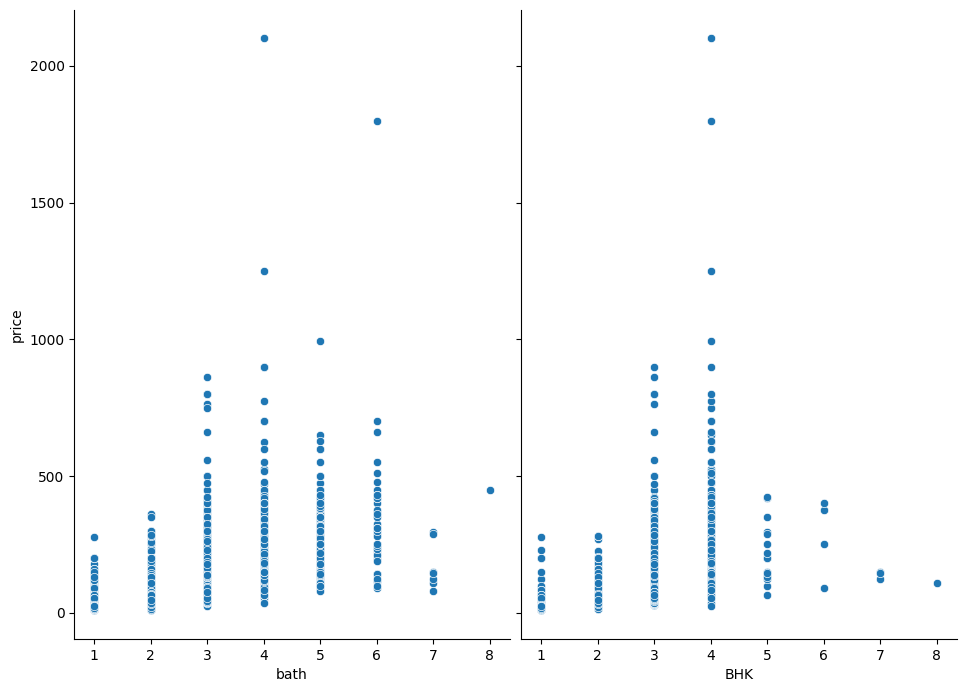

In [51]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(10,8))
sns.pairplot(df4, x_vars=['bath', 'BHK'], y_vars='price',height=7, aspect=0.7)

plt.show()

In [52]:
df4['price_per_sqft'].describe()

count     9605.000000
mean      5589.402120
std       2126.874292
min       1250.000000
25%       4245.283019
50%       5165.631470
75%       6363.636364
max      24000.000000
Name: price_per_sqft, dtype: float64

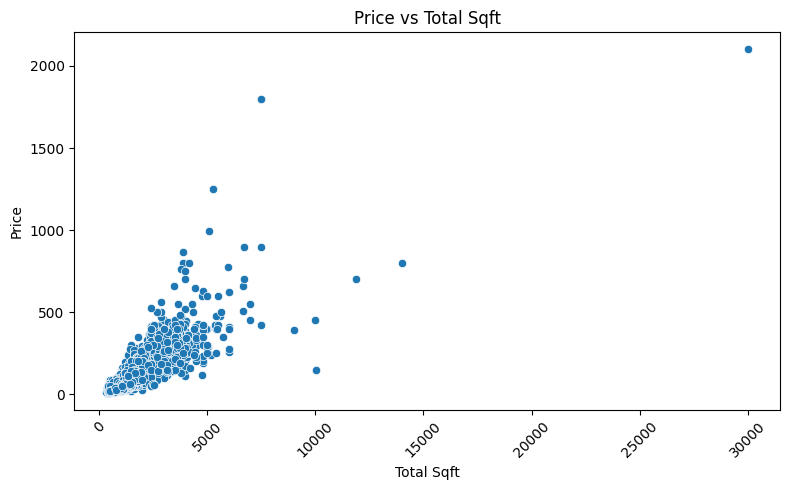

In [53]:
#Scatter Plot: Price vs. Total Sqft To check how property size influences price:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_sqft', y='price', data=df4)
plt.title('Price vs Total Sqft')
plt.xlabel('Total Sqft')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Price')
plt.show()


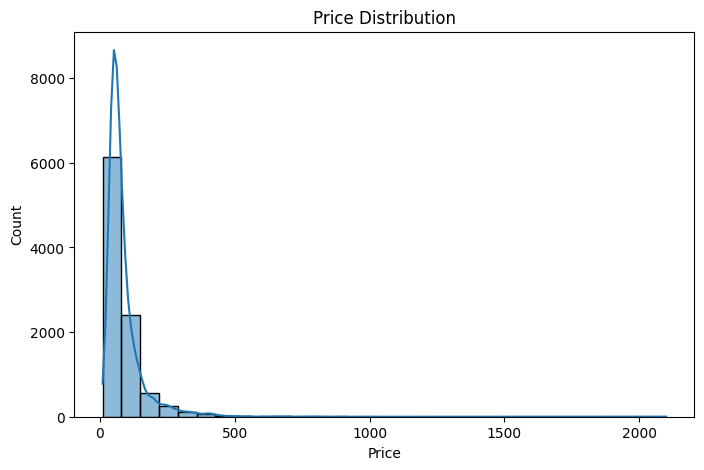

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df4['price'], bins=30,kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


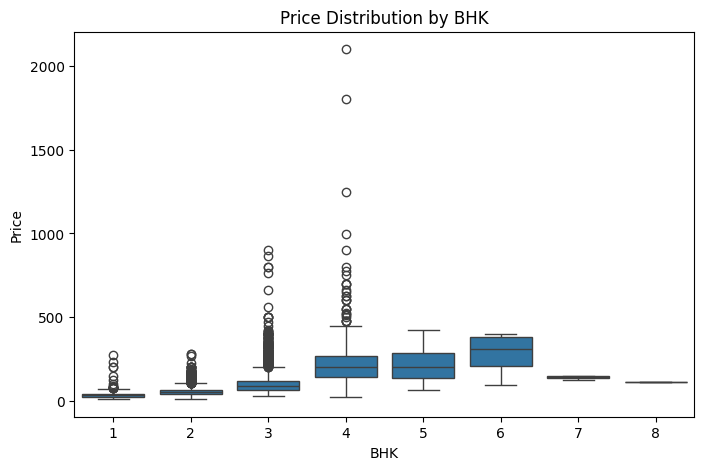

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='BHK', y='price', data=df4)
plt.title('Price Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()


In [56]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [57]:
df5=df4[df4['bath'] <= 6]

df5.shape

(9597, 7)

In [58]:
df6=df5[df5['bath']<= df5['BHK']+2]

In [59]:
df6.shape

(9596, 7)

In [60]:
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [61]:
df7 = df6.drop(columns=["size", "price_per_sqft"])
df7

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
9600,other,1353.0,2.0,110.00,2
9601,other,812.0,1.0,26.00,1
9602,other,1440.0,2.0,63.93,3
9603,other,1075.0,2.0,48.00,2


In [62]:
df7.location.nunique()

242

In [63]:
df7.to_csv("Cleaned_House_Data.csv", index=False)

In [64]:
X=df7.drop(columns=['price'],axis=1)
y=df7['price']

In [65]:
X

,location,total_sqft,bath,BHK
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
9600,other,1353.0,2.0,2
9601,other,812.0,1.0,1
9602,other,1440.0,2.0,3
9603,other,1075.0,2.0,2


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [67]:
column_trans=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['bath','BHK','total_sqft']), #Numerical Columns
        ('cat', OneHotEncoder(sparse_output=False),['location']) #Categorical Columns
    ],
    remainder='passthrough'
)
model=LinearRegression()
pipe=make_pipeline(column_trans,model)

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bath', 'BHK',
                                                   'total_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [69]:
y_pred=pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8322527584151158

In [70]:
'''
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bath', 'BHK', 'total_sqft']),  # Numerical features
        ('cat', OneHotEncoder(), ['location'])  # Categorical features
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
'''

"\n# Define the column transformer\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['bath', 'BHK', 'total_sqft']),  # Numerical features\n        ('cat', OneHotEncoder(), ['location'])  # Categorical features\n    ])\n\n# Create the pipeline\npipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('model', LinearRegression())\n])\n"